---
# **Task 3: Neural Network Models**

**Objectives:**
- Feed Forward Neural Networks with regularization
- Experiment with optimizers, learning rates, activations
- Analyze training curves
- Train Autoencoder for feature compression
- Compare AE features vs raw features

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

c:\Users\zaber\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
# Loading Preprocessed Data
X_train = np.load("../data/X_train_processed.npy")
X_test = np.load("../data/X_test_processed.npy")
y_train = np.load("../data/y_train.npy")
y_test = np.load("../data/y_test.npy")

print("Preprocessed data loaded successfully:")
print("-" * 30)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape:  {y_test.shape}")

Preprocessed data loaded successfully:
------------------------------
X_train shape: (5625, 45)
X_test shape:  (1407, 45)
y_train shape: (5625,)
y_test shape:  (1407,)


In [3]:
# Data Type Conversion
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

y_train = y_train.astype("int32")
y_test = y_test.astype("int32")

print("Data types after conversion:")
print(f"X_train dtype: {X_train.dtype}")
print(f"X_test dtype:  {X_test.dtype}")
print(f"y_train dtype: {y_train.dtype}")
print(f"y_test dtype:  {y_test.dtype}")

Data types after conversion:
X_train dtype: float32
X_test dtype:  float32
y_train dtype: int32
y_test dtype:  int32


In [4]:
# Defining FFNN Architecture
model = Sequential([
    Input(shape=(X_train.shape[1],)),

    Dense(64, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation="relu"),
    Dropout(0.3),

    Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,313 (20.75 KB)

 Trainable params: 5,185 (20.25 KB)

 Non-trainable params: 128 (512.00 B)

In [5]:
# Compile model with Adam optimizer and binary cross-entropy loss
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [6]:
# Early Stopping Callback
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

In [7]:
# Training the Model
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7104 - loss: 0.5502 - val_accuracy: 0.7840 - val_loss: 0.4513
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7729 - loss: 0.4710 - val_accuracy: 0.7982 - val_loss: 0.4154
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7898 - loss: 0.4630 - val_accuracy: 0.7991 - val_loss: 0.4110
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7864 - loss: 0.4426 - val_accuracy: 0.7911 - val_loss: 0.4129
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7953 - loss: 0.4437 - val_accuracy: 0.7982 - val_loss: 0.4131
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7969 - loss: 0.4388 - val_accuracy: 0.7956 - val_loss: 0.4139
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7907 - loss: 0.4336 - val_accuracy: 0.8089 - val_loss: 0.4128
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7984 - loss: 0.4371 - val_accu

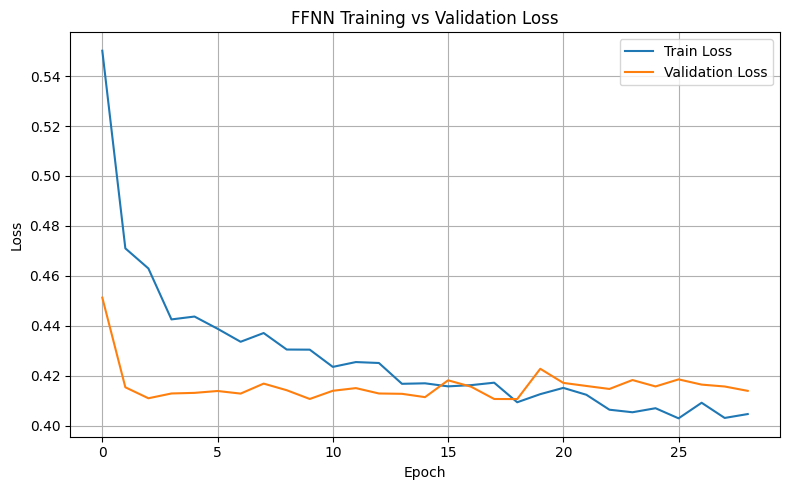

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("FFNN Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
FFNN Test Performance:
------------------------------
Accuracy: 0.7953
F1-score: 0.5826


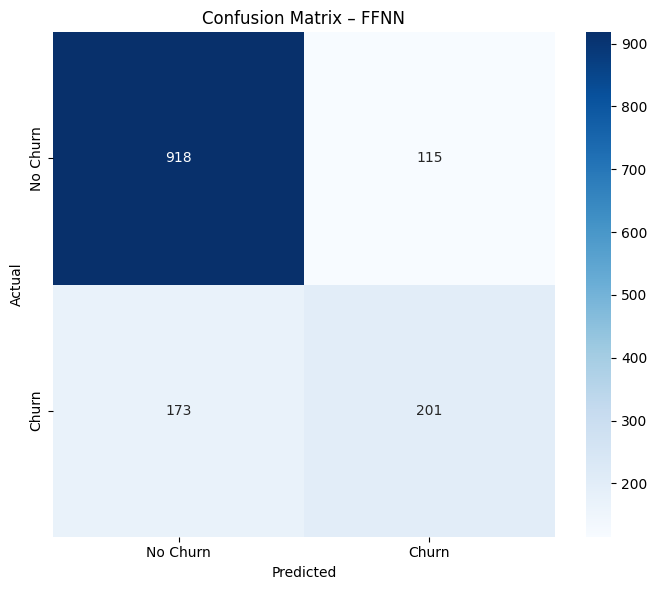

In [9]:
# Evaluating on Test Set

# Predict probabilities
y_pred_prob = model.predict(X_test)

# Convert to class labels
y_pred = (y_pred_prob > 0.5).astype(int)

# Metrics
f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("FFNN Test Performance:")
print("-" * 30)
print(f"Accuracy: {acc:.4f}")
print(f"F1-score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Churn", "Churn"],
    yticklabels=["No Churn", "Churn"]
)
plt.title("Confusion Matrix – FFNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [10]:
print("\nFFNN Threshold Sensitivity Analysis:")
print("-" * 30)

thresholds = [0.3, 0.4, 0.5, 0.6]
for t in thresholds:
    y_pred_t = (y_pred_prob > t).astype(int)
    print(f"Threshold {t:.1f} → F1-score: {f1_score(y_test, y_pred_t):.3f}")


FFNN Threshold Sensitivity Analysis:
------------------------------
Threshold 0.3 → F1-score: 0.601
Threshold 0.4 → F1-score: 0.617
Threshold 0.5 → F1-score: 0.583
Threshold 0.6 → F1-score: 0.460


In [11]:
# Saving FFNN Model
model.save("../data/ffnn_model.keras")

print("FFNN model saved successfully.")
print("Saved path: ../data/ffnn_model.keras")

FFNN model saved successfully.
Saved path: ../data/ffnn_model.keras


### FFNN Summary

- A regularized feed-forward neural network was trained using dropout, batch normalization, and early stopping.
- Training curves indicate controlled overfitting.
- The FFNN achieved competitive performance but did not outperform tree-based models.
- This result is consistent with known limitations of neural networks on structured tabular data.